# Tutorial - Image Deconvolution with SUNet

### Import Packages

In [1]:
from deconv_sunet import deconv_sunet
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Load Ground-based Image (VLT) to be deconvolved

Dimensions = (1, 1, 32, 32)


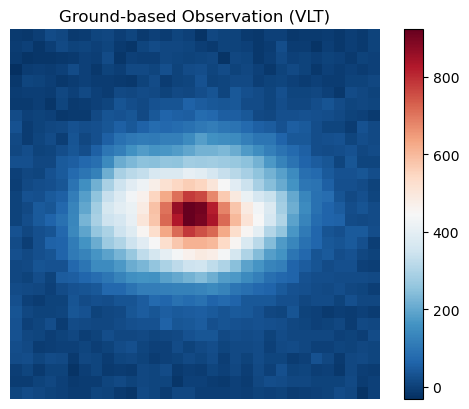

In [2]:
"""    
Convention :

    Input Ground-based noisy Image(s)   : 4D numpy array  (number of samples, channels, height, width).
        
"""

vlt = np.load('../Cantale_dat/Results/Paper/Obj_4/vlt.npy')

print('Dimensions =', vlt.shape)
cmap = 'RdBu_r'

plt.imshow(vlt[0,0,:,:], cmap=cmap)
plt.colorbar()
plt.title('Ground-based Observation (VLT)')
plt.axis('off')
plt.show()

### Load the PSF

Dimensions = (1, 128, 128)
PSF Flux = 0.9999684574263173


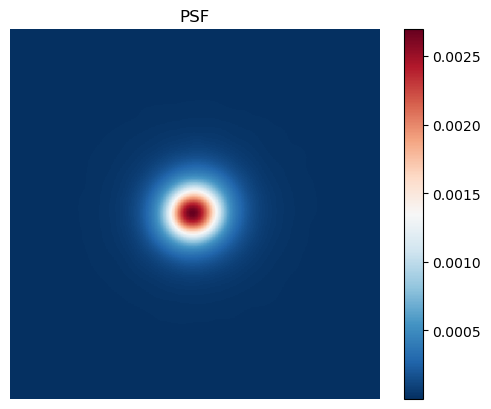

In [3]:
"""    
Convention :

    Point Spread Function (PSF)   : 3D numpy array  (channels, height, width).
    PSF should be flux normalised to 1.
        
"""

psf = np.load('../Cantale_dat/psfs/psf_vlt.npy')
psf = np.expand_dims(psf, axis=0)

print('Dimensions =', psf.shape)
print('PSF Flux =', np.sum(psf))          # PSF should be flux normalised to 1

plt.imshow(psf[0,:,:], cmap=cmap)
plt.colorbar()
plt.title('PSF')
plt.axis('off')
plt.show()

### Load the Space-based Image (HST) for comparison

Dimensions = (128, 128)


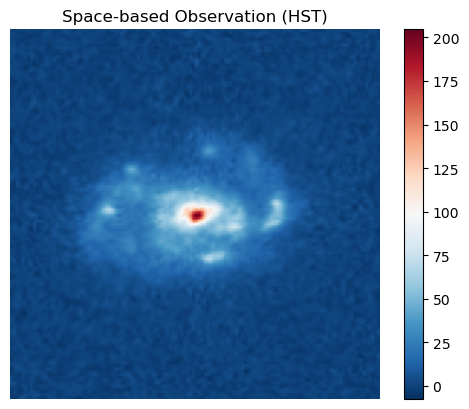

In [4]:
hst = np.load('../Cantale_dat/Results/Paper/Obj_4/HST_norm.npy')

print('Dimensions =', hst.shape)

plt.imshow(hst, cmap=cmap)
plt.colorbar()
plt.title('Space-based Observation (HST)')
plt.axis('off')
plt.show()

### Run Deconvolution

In [5]:
"""
    Run the SUNet deconvolution
    Replace the input paths with the path to your cloned SUNet repository and the path to your SUNet model directory.
"""

# Factor by which the PSF is oversampled with respect to the noisy image
# Deconvolved ouput will have the same dimensions as the PSF
sampling_factor = psf.shape[2]//vlt.shape[2]     

# Run the SUNet deconvolution
deconv_result, _ = deconv_sunet(vlt, 
                                psf, 
                                sampling_factor = sampling_factor,                               # Sampling factor
                                SUNet_path = '/Users/utsavakhaury/Thesis/SUNet/',                # Path to SUNet repository
                                model_dir = '/Users/utsavakhaury/Thesis/SUNet/checkpoints/',     # Path to SUNet model directory
                                model_name = 'new_model_bestSSIM_ep-400_bs-16_ps-1.pth')         # Name of the pre-trained SUNet model)

deconv_result.shape             # Shape = (vlt.shape[0], vlt.shape[1], vlt.shape[2]*sampling_factor, vlt.shape[3]*sampling_factor)

/Users/utsavakhaury/opt/miniconda3/envs/test3/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1656352706847/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(1, 1, 128, 128)

### Plot Results

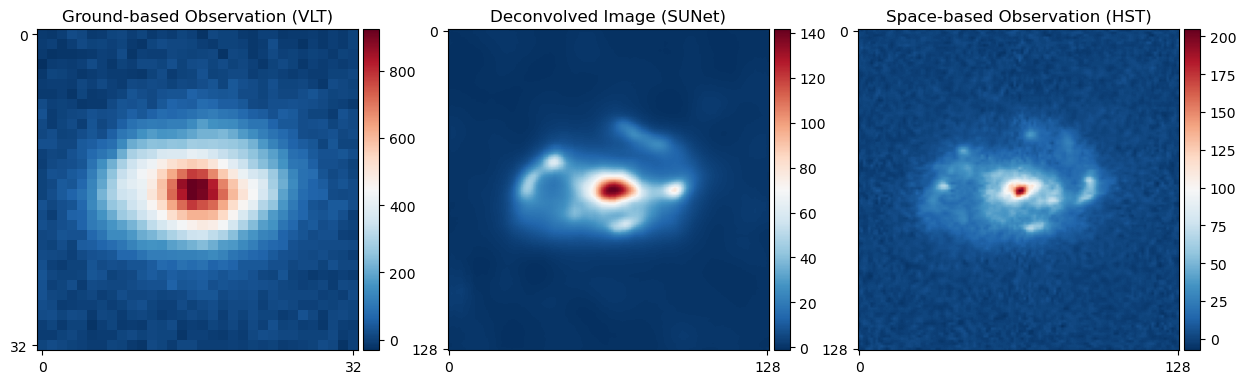

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
im1 = ax[0].imshow(vlt[0,0], cmap=cmap)
ax[0].set_title('Ground-based Observation (VLT)')
ax[0].set_xticks([0, vlt[0,0].shape[0]-1], labels=[0, vlt[0,0].shape[0]])
ax[0].set_yticks([0, vlt[0,0].shape[1]-1], labels=[0, vlt[0,0].shape[1]])
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

im2 = ax[1].imshow(deconv_result[0,0], cmap=cmap)
ax[1].set_title('Deconvolved Image (SUNet)')
ax[1].set_xticks([0, deconv_result[0,0].shape[0]-1], labels=[0, deconv_result[0,0].shape[0]])
ax[1].set_yticks([0, deconv_result[0,0].shape[1]-1], labels=[0, deconv_result[0,0].shape[1]])
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im2, cax=cax)

im3 = ax[2].imshow(hst, cmap=cmap)
ax[2].set_title('Space-based Observation (HST)')
ax[2].set_xticks([0, hst.shape[0]-1], labels=[0, hst.shape[0]])
ax[2].set_yticks([0, hst.shape[1]-1], labels=[0, hst.shape[1]])
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im3, cax=cax)

plt.show()